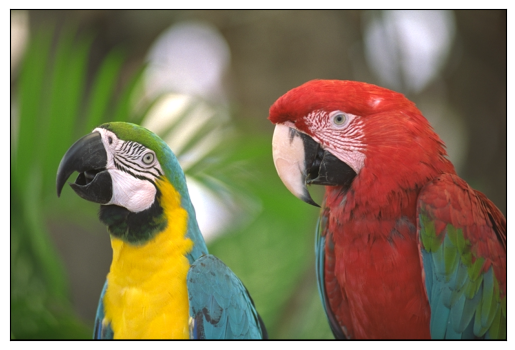

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
myPath=''
loros = cv.imread(myPath+'img/kodim23.png',1)
lorosc = cv.cvtColor(imagen, cv.COLOR_BGR2RGB) # Matplotlib espera RGB
plt.xticks([]),plt.yticks([])
plt.imshow(lorosc)

Las imágenes pueden sumarse, pero es importante entender que cada pixel es una terna que va de 0 a 255. La suma aritmética va a estar acotada y la misma altera el valor de los pixeles

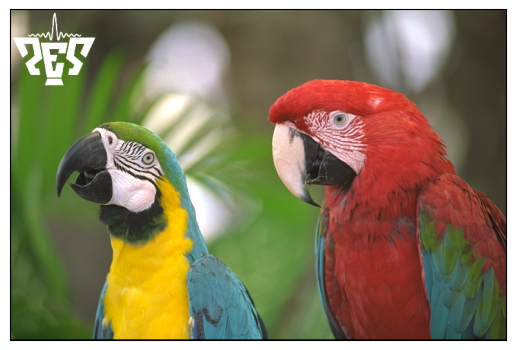

In [19]:
logo = cv.imread(myPath+'img/logo_pes.png',1)
suma = cv.add(loros,logo) # Suma aritmetica
sumac = cv.cvtColor(suma, cv.COLOR_BGR2RGB)
plt.xticks([]),plt.yticks([])
plt.imshow(sumac)

Tambien es posible sumar imágenes con un peso que da un efecto de transparencia.

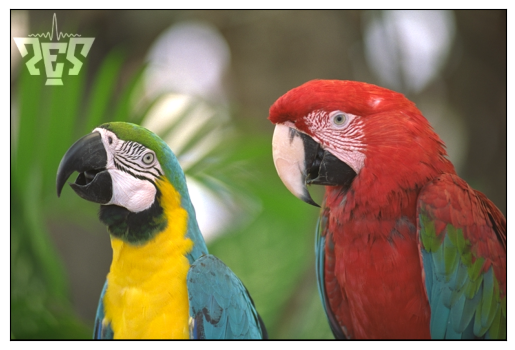

In [20]:
suma = cv.addWeighted(imagen,1,logo,0.4,0)
sumac = cv.cvtColor(suma, cv.COLOR_BGR2RGB)
plt.xticks([]),plt.yticks([])
plt.imshow(sumac)

Ahora supongamos que quiero pegar otra imagen arriba, pero manteniendo el color orignal de ambas.
Una opción es hacer operaciones a nivel de bit (and, or, ...).

**Vamos a ver como toma mate el loro de la izquierda**

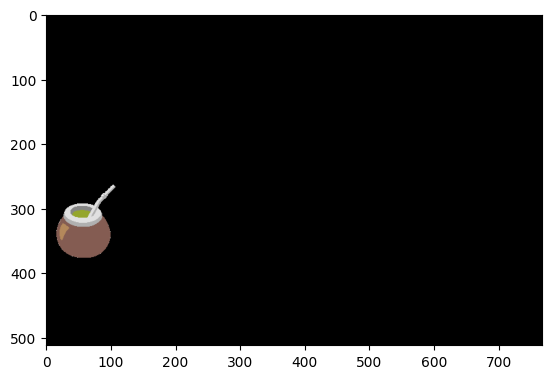

In [21]:
mate = cv.imread(myPath+'img/mate.png',1)
matec = cv.cvtColor(mate, cv.COLOR_BGR2RGB) # Matplotlib espera RGB
plt.imshow(matec)

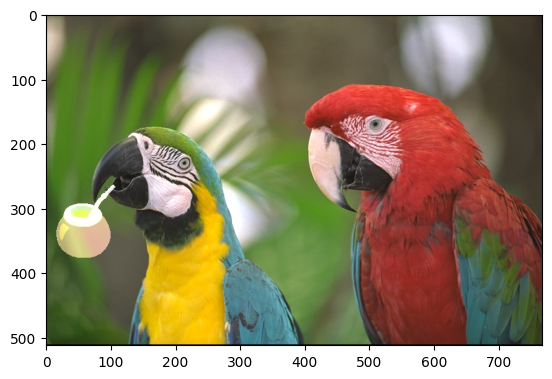

In [22]:
mate = cv.imread(myPath+'img/mate.png',1)
suma_directa = cv.add(mate, imagen)
matec = cv.cvtColor(suma_directa, cv.COLOR_BGR2RGB) # Matplotlib espera RGB
plt.imshow(matec)
#No es esto lo que quería

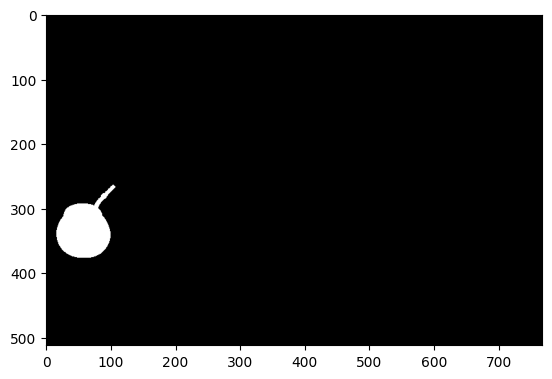

In [23]:
rows,cols,channels = mate.shape
roi = loros[0:rows, 0:cols ]  # Se define una ROI donde queda alineada la nueva imagen con el fondo

# Se crea una mascara
img2gray = cv.cvtColor(mate,cv.COLOR_BGR2GRAY) # Paso a gray
ret, mask = cv.threshold(img2gray, 30, 255, cv.THRESH_BINARY) # Se quedan con todos los elementos que superen el threshold
plt.imshow(mask, cmap='gray')


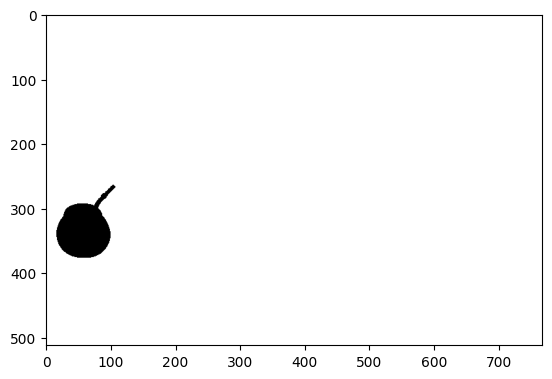

In [24]:
mask_inv = cv.bitwise_not(mask)  # Se invierte la mascara
plt.imshow(mask_inv, cmap='gray')

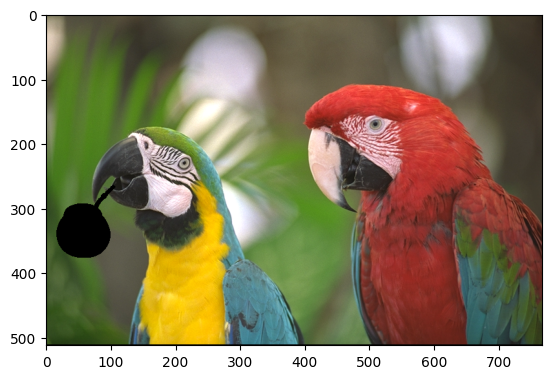

In [25]:
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv) # Imagen de fondo, orignal con recorte de nueva imagen
img_show = cv.cvtColor(img1_bg,cv.COLOR_BGR2RGB)
plt.imshow(img_show)

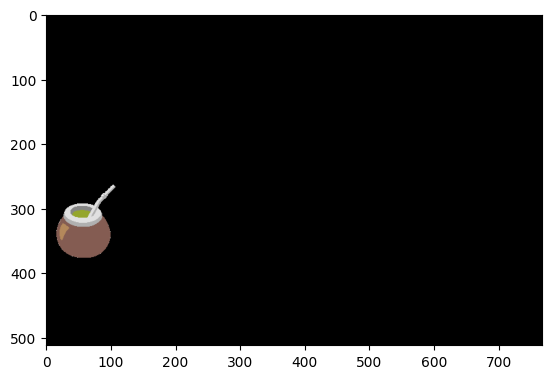

In [26]:
img2_fg = cv.bitwise_and(mate,mate,mask = mask) # Imagen nueva de frente
img2_fg_t = cv.cvtColor(img2_fg, cv.COLOR_BGR2RGB) # Matplotlib espera RGB
plt.imshow(img2_fg_t)

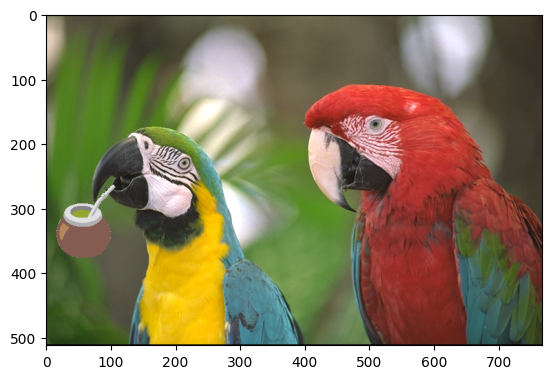

In [27]:
dst = cv.add(img1_bg,img2_fg) # Ahora si pueden sumarse, y no va a saturar
loros[0:rows, 0:cols ] = dst
lorosp = cv.cvtColor(loros, cv.COLOR_BGR2RGB)
plt.imshow(lorosp)
#cv2.imwrite('loros_mate.png',loros)